In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def model(X,y,CV_flag):
    if CV_flag == True:
        parameters = [
            {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
            {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
            {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
            {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
            ]

        clf = GridSearchCV(svc, parameters, verbose=2, n_jobs=3)
        #clf=svc
        clf.fit(X,y)
        print("Best estimator found by grid search:")
        print(clf.best_estimator_)

    else:
        clf = svm.SVC(C=1000, kernel='poly', gamma=0.001,degree=2)
        #svc=svm.SVC()
        #parameters=[{'C': [1000], 'kernel': ['poly'], 
        #             'degree': [2], 'gamma': [0.1,0.01,0.001]}]
        #clf = GridSearchCV(svc, parameters, verbose=2, n_jobs=3)
        clf.fit(X,y)

    return clf


def model_estimation(fitted_model, X_test, y_test):
    test_score = fitted_model.score(X_test,y_test)
    y_pred = fitted_model.predict(X_test)
    print(test_score)
    print(metrics.classification_report(y_test, y_pred, 
                                        target_names=["0","1","2","3","4","5","6","7","8","9"]))
    print(metrics.confusion_matrix(y_test, y_pred, labels=range(10)))
    plt.clf()


In [2]:
DATAPATH = "data/digits.csv"
CV_flag = False
df = pd.read_csv(DATAPATH)
y = df["label"].values
labels = df["label"] 
X = df.drop("label",axis=1).values/255
print(y)
print(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = model(X_train,y_train,CV_flag)

[1 0 1 ... 4 7 9]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
model_estimation(clf, X_test, y_test)

0.9595
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       218
          1       0.96      1.00      0.98       202
          2       0.95      0.96      0.96       196
          3       0.95      0.97      0.96       173
          4       0.95      0.98      0.97       187
          5       0.98      0.93      0.95       197
          6       0.98      0.98      0.98       224
          7       0.97      0.93      0.95       212
          8       0.94      0.95      0.94       195
          9       0.93      0.91      0.92       196

avg / total       0.96      0.96      0.96      2000

[[216   0   0   0   0   0   1   0   1   0]
 [  0 201   1   0   0   0   0   0   0   0]
 [  1   2 189   0   0   0   0   1   1   2]
 [  1   0   1 167   0   1   0   0   2   1]
 [  0   0   0   0 183   0   2   0   0   2]
 [  1   1   1   6   0 183   1   0   2   2]
 [  1   0   0   0   1   1 220   0   1   0]
 [  2   3   3   0   1   0   0 197   2   4]
 [  0   1 

<Figure size 432x288 with 0 Axes>

In [4]:
from sklearn.model_selection import cross_val_score
svm_ = svm.SVC(C=1000,gamma=0.001,kernel="poly",degree=2)
scores=cross_val_score(svm_,X,y,cv=5,verbose=2,n_jobs=3)

[Parallel(n_jobs=3)]: Done   3 out of   5 | elapsed:  1.2min remaining:   46.0s
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  1.5min finished


In [5]:
print(scores)

[0.96255617 0.95852074 0.9645     0.95397699 0.95743615]


In [6]:
tsne = TSNE(random_state=42,verbose=1,)
tsne_train = tsne.fit_transform(X_train)
tsne_test = tsne.fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.866s...
[t-SNE] Computed neighbors for 8000 samples in 96.683s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Computed conditional probabilities for sample 3000 / 8000
[t-SNE] Computed conditional probabilities for sample 4000 / 8000
[t-SNE] Computed conditional probabilities for sample 5000 / 8000
[t-SNE] Computed conditional probabilities for sample 6000 / 8000
[t-SNE] Computed conditional probabilities for sample 7000 / 8000
[t-SNE] Computed conditional probabilities for sample 8000 / 8000
[t-SNE] Mean sigma: 2.094219
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.062218
[t-SNE] Error after 1000 iterations: 1.742935
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.094s...
[t-SNE] Computed neighbors for 2000 samples in 6.021s...
[t-SNE] Computed conditional probabi

[[1]
 [6]
 [5]
 ...
 [8]
 [2]
 [7]]


TypeError: Input z must be at least a 2x2 array.

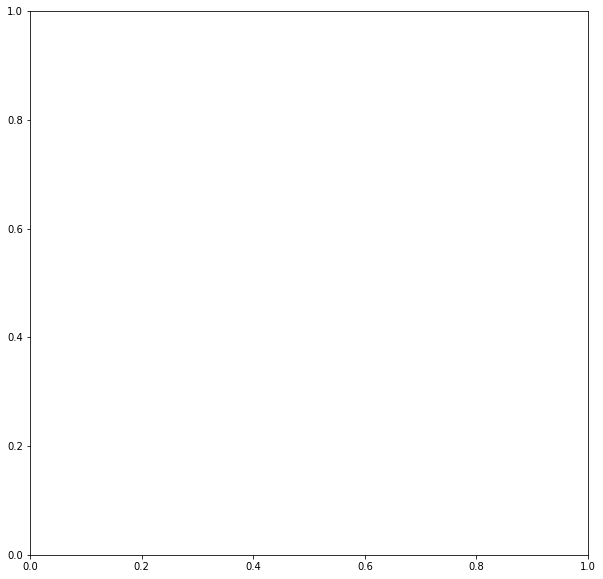

In [31]:
colors = ["red","blue","orange","greenyellow","green",
          "purple", "cyan","yellow","brown","black"]
h=.02

plt.figure(figsize=(10,10))
plt.clf()
Z = clf.predict(tsne_test)
Z= Z.reshape(2000,1)
print(Z)
plt.contourf(tsne_test[:,0],tsne_test[:,1],Z,cmap=plt.cm.Paired)
plt.xlim(tsne_test[:,0].min(),tsne_test[:,0].max() + 1)
plt.ylim(tsne_test[:,1].min(),tsne_test[:,1].max() + 1)
for i in range(len(X_test)):
    plt.text(tsne_test[i,0],tsne_test[i,1],str(y_test[i]),
            color=colors[int(y_test[i])],
            fontdict={"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")